# Лабораторная работа 3.7.1
## Скин-эффект в полом цилиндре

## 1. Аннотация.
__Цель работы:__ исследование проникновения переменного магнитного поля в медный полый цилиндр.

__В рботе используются:__ генератор звуковой частоты, соленоид, намотанный цилиндрический каркас из диэлеткрика, медный экран в виде трубки, измерительная катушка, амперметр, вольметр, осциллограф.

## 2. Теоретические сведения.

$\triangledown^2 E = \sigma \mu\mu_0 \frac{\partial E}{\partial t}$

Пусть $E_y = E_y(x, t)$

$\frac{\partial ^ 2 E}{\partial x ^ 2}  = \sigma \mu\mu_0 \frac{\partial E}{\partial t}$

$E_y(x, t) = E(x) e ^ {i\omega t}$

$\frac{d^2E}{dx^2} = i\omega \sigma \mu \mu_0 E$

$E(x) = E_0 e^{\alpha x}$, $\alpha \in C$ - комплексная константа

$\alpha = i\omega \sigma \mu \mu_0$

$\alpha = \pm \frac{1 + i}{\sqrt{2}} \sqrt{\omega \sigma \mu \mu_0}$ - для бесконечной среды имеет смысл только "-"

Следовательно, $E_y(x, t) = E_0 e^{-x/\delta} e^{i(\omega t - x / \delta)}$

$\delta = \sqrt{\frac{2}{\omega \sigma \mu \mu_0}} = \sqrt{\frac{2D}{\omega}}$ - глубина проникновения

## 3. Экспериментнальная установка

Мангнитное поле внутри цилиндра измеряется катушкой 3. Напряжение на катушке
пропорционалньна производной $\dot{B_1}(t)$

$$
 U(t) \propto \dot{B_1}(t) = -i\omega H_1 e^{i\omega t}
$$

Поле внутри цилиндра пропорциональна току через соленоид

$$
B_0(t) \propto I(t)
$$

Отсюда несложно увидеть, что

$$
    \frac{|H_1|}{|H_0|} = c \cdot \frac{U}{\nu I} = c \xi
$$

где константу можно определить из условия $|H_1|/|H_2| \rightarrow 1$ при
$\nu \rightarrow 0$.


При измерениях разности фаз нужно учесть, что первый сигнал на осциллографе
пропорционален магнитному полю снаружи, а второй пропорционален производному
поля внутри цилиндра по времени. Вследствии этого набегает дополнительная фаза $\pi/2$,
которую надо вычесть при измерениях.

![Alt text](%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B0371.png)

## 4. Результаты измерений и обработка данных.

Построим зависимоть $1/\xi ^ 2(\nu ^ 2)$

$\xi = U/\nu I$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MNK

In [2]:
dict1 = {
    'nu, Гц': np.array([23, 30, 38, 51, 63, 72, 85, 97, 110, 79, 47]),
    'U, В'  : np.array([0.0813, 0.1047, 0.1303, 0.1689, 0.2005, 0.2218, 0.2489, 0.2704, 0.2903, 0.2367, 0.1572]),
    'I, мА' : np.array([257.18, 255.89, 253.86, 249.81, 245.48, 242.1, 237.08, 232.57, 227.93, 239.16, 250.73])
}

df1 = pd.DataFrame(dict1)

In [3]:
df1

,"nu, Гц","U, В","I, мА"
0,23,0.0813,257.18
1,30,0.1047,255.89
2,38,0.1303,253.86
3,51,0.1689,249.81
4,63,0.2005,245.48
5,72,0.2218,242.10
6,85,0.2489,237.08
7,97,0.2704,232.57
8,110,0.2903,227.93
9,79,0.2367,239.16


In [4]:
df1['xi, В/(Гц * А)'] = df1['U, В'] / (df1['nu, Гц'] * df1['I, мА'] / 1000)
#plt.plot(1/ (df1['xi, В/(Гц * А)']) ** 2, df1['nu, Гц'] ** 2, 'o')

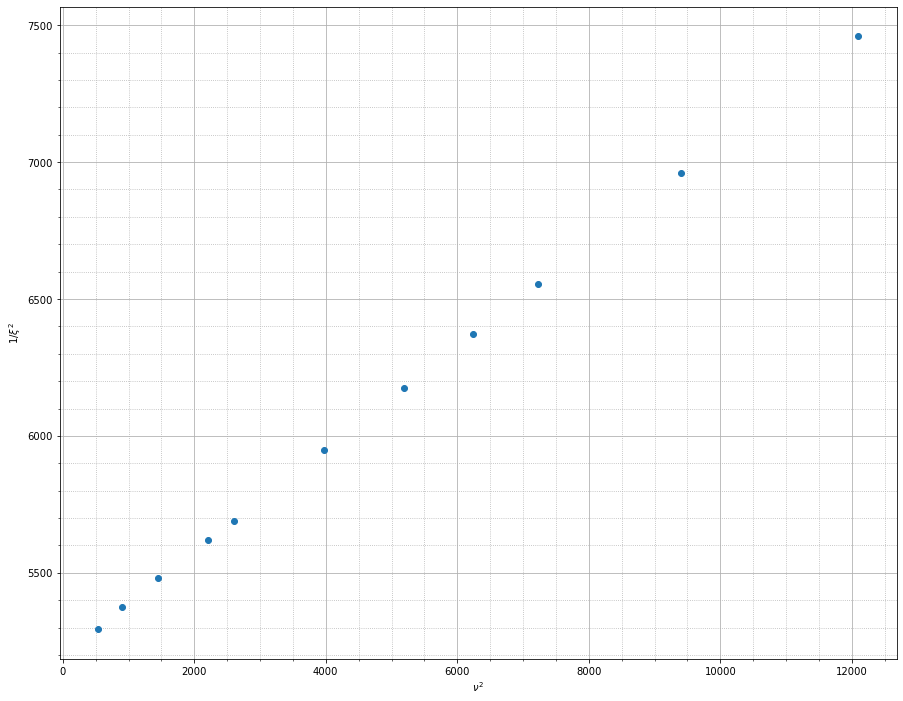

In [5]:
fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("1/$\\xi ^ 2$")
ax.set_xlabel("$\\nu ^ 2$")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.plot(df1['nu, Гц'] ** 2, 1/ (df1['xi, В/(Гц * А)']) ** 2, 'o')

plt.show()

При $\nu << \nu_h$ получаем:

$$ \frac{1}{\xi^2} = B\nu^2 + c^2 $$
где $B = \pi ah\sigma\mu_0 c$

$\sigma = \frac{B}{\pi a h \mu_0 c}$

Так как точность приборов довольно высокая, погрешностью на данном графике можно принебречь.

In [8]:
def MNK_func (x, y, err_x = None, err_y = None, pl = None, lab = None, color = None):
    '''
    Parameters
    ---------- 
    x:     np.array(1, n_objects) - array of x-axis values
    y:     np.array(1, n_objects) - array of y-axis values
    err_x: np.array(1, n_objects) - array of errors on x-axis
    err_y: np.array(1, n_objects) - array of errors on y-axis
    pl:    matplotlib.pyplot
    lab:   string - label on your plot
    color: string - color of your plot

    Returns
    -------
    k:  float - slope of function
    qk: float - error of k
    b:  float - bias term of function
    qb: float - error of b
    '''

    x = np.array(x)
    y = np.array(y)

    p = np.polyfit(x, y, 1)

    k = p[0]
    b = p[1]

    qk = np.sqrt( np.abs(1 / (len(x) - 2) * ((np.mean(y ** 2) - np.mean(y) ** 2) / (np.mean(x ** 2) - (np.mean(x)) ** 2) - k ** 2)))

    qb = qk * np.sqrt(np.mean(x ** 2))

    if pl:
        pl.errorbar(x, y, err_y, err_x, label = lab, marker='o', linestyle = '', c = color)
        pl.plot ([min(x), max(x)], [fx(min(x), k, b), fx(max(x), k, b)], c = color)

    return [k, abs(qk), b, abs(qb)]

In [14]:
MNK_list = MNK_func(df1['nu, Гц'] ** 2, 1/ (df1['xi, В/(Гц * А)']) ** 2)
B = MNK_list[0]
sigma_B = MNK_list[1]

In [23]:
c = np.sqrt(MNK_list[2])
sigma_c = np.sqrt(MNK_list[3])

sigma_m = B / (np.pi * 22.5 * 10 ** (-3) * 1.5 * 10 ** (-3) * 1.2567 * 10 ** (-6) * c)

sigma_sigma = sigma_m * np.sqrt((sigma_c / c) ** 2 + (sigma_B / B) ** 2)

print(f"B = {B}, sigma_B = {sigma_B}\nc = {c}, sigma_c = {sigma_c}\nsigma_m = {sigma_m}, sigma_sigma = {sigma_sigma}")

B = 0.1864768526145832, sigma_B = 0.00040290854034927894
c = 72.15548425679489, sigma_c = 1.5424346987427995
sigma_m = 19395470.52435163, sigma_sigma = 416720.5513782867


Из графика получаем значение $c$, а также проводимости меди $\sigma$:

$c = (72.155 \pm 1.542)$, $\sigma = (1.94 \pm 0.04) * 10 ^7 См/c$

### Измерение свдига фаз на маленьких частотах.

$\tan{\psi} = k \nu$

$k = \pi a h \sigma \mu_0$ 

In [38]:
dict2 = {
    'nu, Гц'   : np.array([112, 125, 140, 163, 185, 205, 225, 310, 423, 515, 630, 744, 877, 973, 1121]),
    'U, В'     : np.array([0.2924, 0.3088, 0.3245, 0.3434, 0.3569, 0.3663, 0.3736, 0.3905, 0.3964, 0.3951, 0.3899, 0.3824, 0.3718, 0.3634, 0.3497]),
    'I, мА'    : np.array([226.41, 222.18, 217.70, 211.79, 207.06, 203.39, 200.26, 190.92, 183.25, 178.64, 173.55, 168.69, 163.03, 158.91, 152.56]),
    'x_0'      : np.array([22.5, 20, 18, 15, 14, 12, 11, 16, 24, 19.5, 16, 34, 29, 0.1, 0.1]),
    'x_сдвига' : np.array([4, 2.5, 2.5, 2, 2, 1, 1, 1, 1, 1, 0.5, 1, 0.1, 0, 0])
}

In [39]:
len(dict2['I, мА'])

15

In [40]:
df2 = pd.DataFrame(dict2)

In [71]:
df2

,"nu, Гц","U, В","I, мА",x_0,x_сдвига,tg(psi),sigma_tg
0,112,0.2924,226.41,22.5,4.0,-0.487733,-0.007862
1,125,0.3088,222.18,20.0,2.5,-1.000000,-0.040625
2,140,0.3245,217.70,18.0,2.5,-0.839100,-0.034211
3,163,0.3434,211.79,15.0,2.0,-0.900404,-0.057276
4,185,0.3569,207.06,14.0,2.0,-0.797473,-0.050859
5,205,0.3663,203.39,12.0,1.0,-1.732051,-0.436020
6,225,0.3736,200.26,11.0,1.0,-1.556030,-0.392223
7,310,0.3905,190.92,16.0,1.0,-2.414214,-0.605911
8,423,0.3964,183.25,24.0,1.0,-3.732051,-0.934633
9,515,0.3951,178.64,19.5,1.0,-2.995366,-0.750811


In [72]:
df2['tg(psi)'] = np.tan(2 * np.pi * df2['x_сдвига'] / df2['x_0'] + np.pi / 2)

In [73]:
df2['sigma_tg'] = df2['tg(psi)'] * ((0.5 / df2['x_0']) ** 2 + (0.5 / df2['x_сдвига']) ** 2)

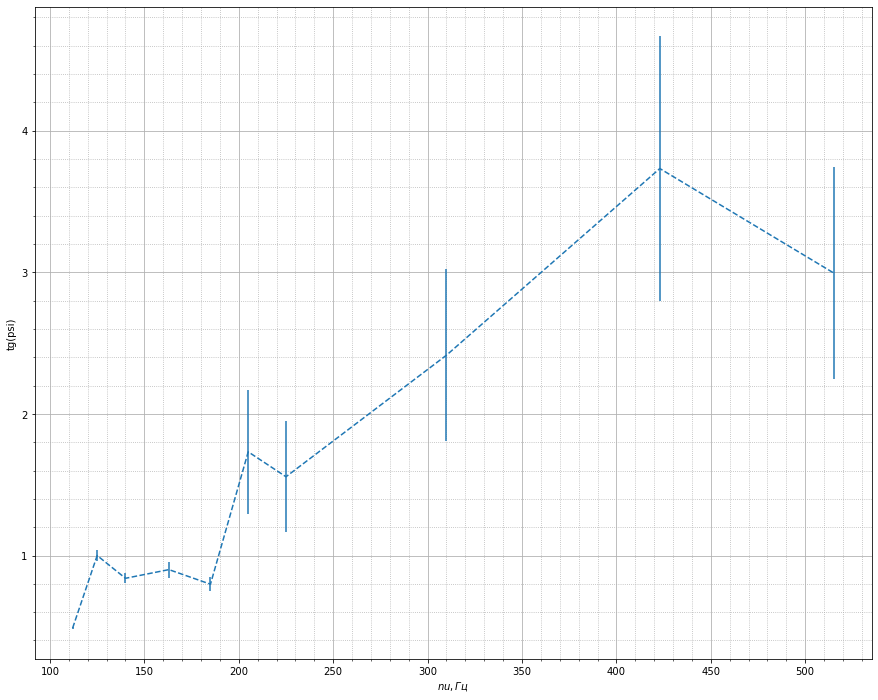

In [168]:
fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("tg(psi)")
ax.set_xlabel("$nu, Гц$")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

# ax.plot(df2['nu, Гц'], df2['tg(psi)'], 'o')
ax.errorbar(df2['nu, Гц'][:-2], np.abs(df2['tg(psi)'][:-2]), yerr = df2['sigma_tg'][:-2], linestyle = 'dashed')

plt.show()

In [83]:
MNK_list2 =  MNK_func(df2['nu, Гц'][:-2], np.abs(df2['tg(psi)'][:-2]))

In [84]:
sigma2 = MNK_list2[0] / (np.pi * 22.5 * 10 ** (-3) * 1.5 * 10 ** (-3) * 1.2567 * 10 ** (-6))
sigma_sigma2 = sigma2 * MNK_list2[1] / MNK_list2[0]

print(f'sigma 2 = {sigma2}, sigma_sigma2 = {sigma_sigma2}')

sigma 2 = 55465877.992798015, sigma_sigma2 = 8036303.718713419


Из графика находим: $\sigma = (5.55 \pm 0.80) См/м$

### Измерение свдига фаз на больших частотах.

$\psi - \pi / 4 = k \sqrt{\nu}$, $k = h \sqrt{\pi \mu_0 \sigma}$

In [85]:
dict3 = {
    'nu, Гц'   : np.array([1375, 1680, 2052, 2506, 3061, 3740, 4568, 5580, 6816, 8326, 10170, 12422, 15174, 18535, 22640, 27655, 33780]),
    'U, В'     : np.array([0.3258, 0.2976, 0.2661, 0.2329, 0.1996, 0.1680, 0.1389, 0.1130, 0.0881, 0.0697, 0.0540, 0.0411, 0.031, 0.0234, 0.0173, 0.0098, 0.006]),
    'I, мА'    : np.array([141.75, 129.49, 116.02, 102, 88.11, 75.02, 63.08, 50.749, 42.245, 34.741, 28.183, 22.438, 17.351, 12.761, 8.49, 4.2838, 1.2840]),
    'x_сдвига' : np.array([8, 13, 21, 18, 19, 21, 21.5, 21.5, 22, 22, 19, 19, 20, 17, 16, 15, 14])
}

In [86]:
df3 = pd.DataFrame(dict3)

In [92]:
#df3

In [88]:
df3['psi'] = df3['x_сдвига'] / 5 * 50 * 10 ** (-6) * df3['nu, Гц'] 

In [89]:
df3

,"nu, Гц","U, В","I, мА",x_сдвига,psi
0,1375,0.3258,141.7500,8.0,0.11000
1,1680,0.2976,129.4900,13.0,0.21840
2,2052,0.2661,116.0200,21.0,0.43092
3,2506,0.2329,102.0000,18.0,0.45108
4,3061,0.1996,88.1100,19.0,0.58159
5,3740,0.1680,75.0200,21.0,0.78540
6,4568,0.1389,63.0800,21.5,0.98212
7,5580,0.1130,50.7490,21.5,1.19970
8,6816,0.0881,42.2450,22.0,1.49952
9,8326,0.0697,34.7410,22.0,1.83172


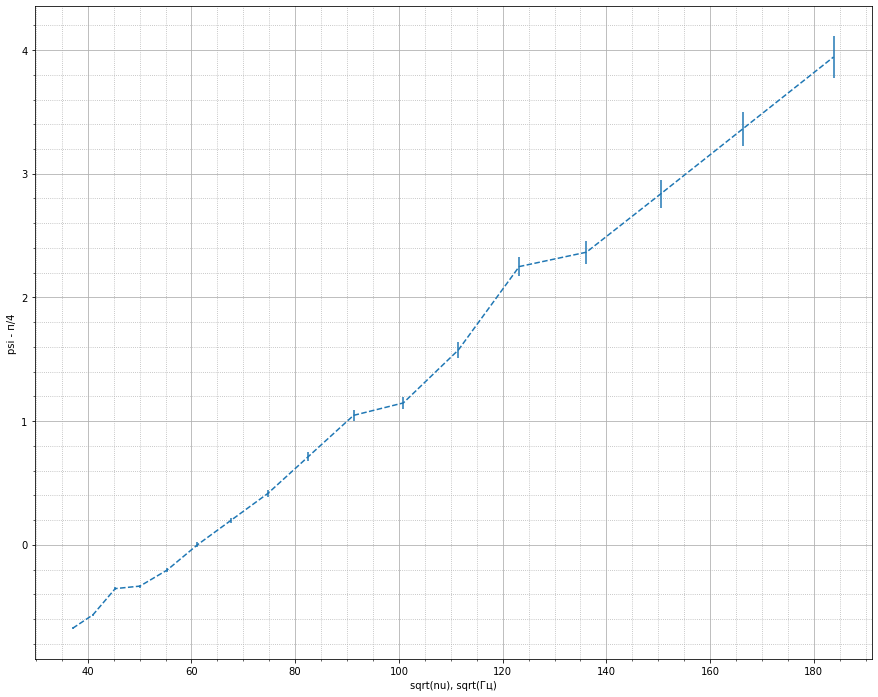

In [169]:
fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("psi - п/4")
ax.set_xlabel("sqrt(nu), sqrt(Гц)")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

# ax.plot(df2['nu, Гц'], df2['tg(psi)'], 'o')
ax.errorbar(np.sqrt(df3['nu, Гц']), df3['psi'] - np.pi / 4, yerr = df3['psi'] * 0.5 / df3['x_сдвига'], linestyle = 'dashed')

plt.show()

In [100]:
MNK_list3 = MNK_func(np.sqrt(df3['nu, Гц']), df3['psi'] - np.pi / 4)
sigma_3 = (MNK_list3[0] / (1.5 * 10 ** (-3))) ** 2 * 1 / (np.pi * 1.2567 * 10 ** (-6))
sigma_sigma3 = sigma_3 * MNK_list3[1] / MNK_list3[0]

print(MNK_list3[0])
print(f'sigma3 = {sigma_3}, sigma_sigma3 = {sigma_sigma3}')

0.031661187421358816
sigma3 = 112847097.01124328, sigma_sigma3 = 1727397.5688665113


Из графика находим: $\sigma = (11.2 \pm 0.17) См/м$

### Измерение проводимости через измерение индуктивности.

$\frac{L_{max} - L}{L - L_{min}} = (\pi a h \mu_0 \sigma \nu) ^ 2$

In [101]:
dict4 = {
    'nu, Гц': np.array([40, 120, 250, 300, 400, 500, 600, 750, 800, 1000, 1500, 4000, 10000, 15000, 20000, 25000]),
    'L, мГн': np.array([18.95, 14.55, 9.958, 8.98, 7.811, 7.118, 6.588, 5.825, 5.603, 5.473, 5.678, 5.079, 5.292, 5.866, 6.786, 8.819])
}

In [102]:
df4 = pd.DataFrame(dict4)

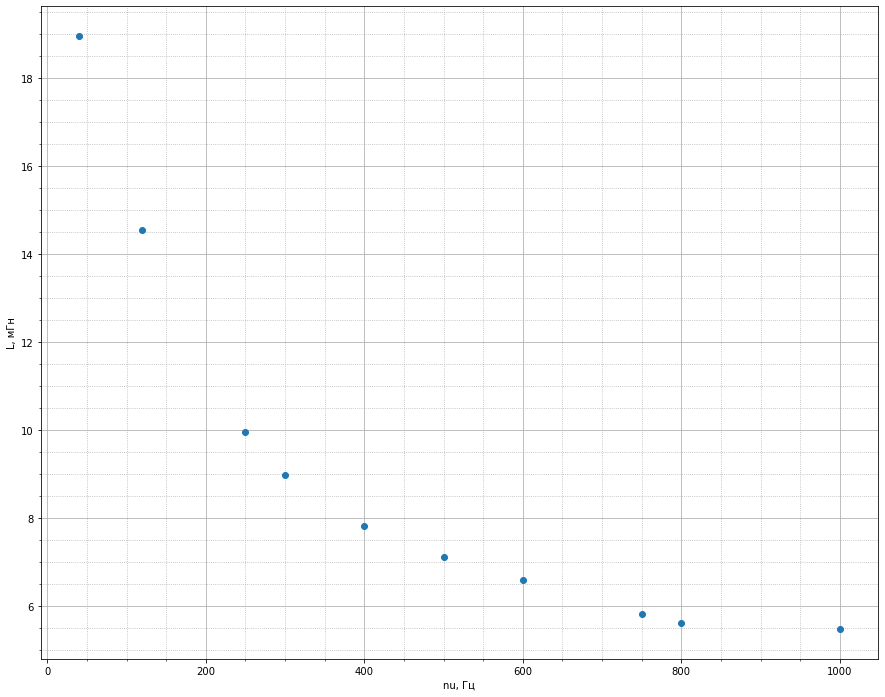

In [170]:
fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("L, мГн")
ax.set_xlabel("nu, Гц")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.plot(df4['nu, Гц'], df4['L, мГн'], 'o')
# ax.errorbar(np.sqrt(df3['nu, Гц']), df3['psi'] - np.pi / 4, yerr = df3['psi'] * 0.5 / df3['x_сдвига'], linestyle = 'dashed')

plt.show()

In [105]:
df4 = df4.drop([15, 14, 13, 12, 11, 10])

In [106]:
df4

,"nu, Гц","L, мГн"
0,40,18.950
1,120,14.550
2,250,9.958
3,300,8.980
4,400,7.811
5,500,7.118
6,600,6.588
7,750,5.825
8,800,5.603
9,1000,5.473


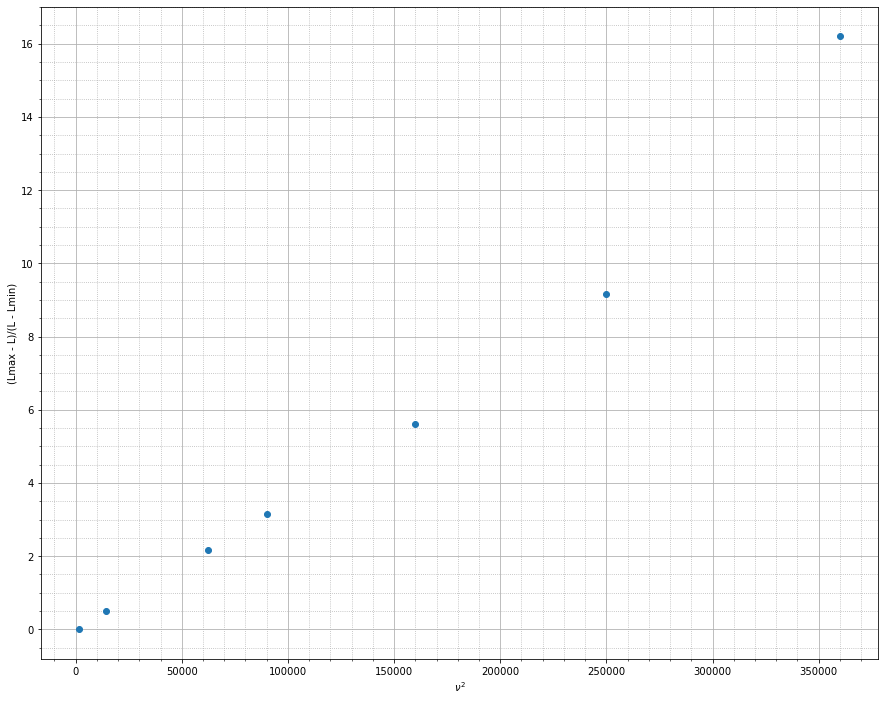

In [171]:
fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("(Lmax - L)/(L - Lmin)")
ax.set_xlabel("$\\nu ^ 2$")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

ax.plot(df4['nu, Гц'][:-2] ** 2, (df4['L, мГн'][:-2].max() - df4['L, мГн'][:-2]) / (df4['L, мГн'][:-2] - df4['L, мГн'][:-2].min()), 'o')
# ax.errorbar(np.sqrt(df3['nu, Гц']), df3['psi'] - np.pi / 4, yerr = df3['psi'] * 0.5 / df3['x_сдвига'], linestyle = 'dashed')

plt.show()

In [172]:
MNK_list4 = MNK_func(df4['nu, Гц'][:-3] ** 2, np.array((df4['L, мГн'][:-2].max() - df4['L, мГн'][:-2]) / (df4['L, мГн'][:-2] - df4['L, мГн'][:-2].min()))[:-1])


In [152]:
sigma3 = np.sqrt(MNK_list4[0] / (np.pi * 22.5 * 10 ** (-3) * 1.5 * 10 ** (-3) * 1.2567 * 10 ** (-6)) ** 2)

In [155]:
sigma_sigma3 = sigma3 * MNK_list4[1] / MNK_list4[0]

In [158]:
sigma3

49407765.2059434

Из графика находим: $\sigma = (4.94 \pm 0.30) См/м$

### Оношение магнитных полей.

Экспериментальная зависимость: $H_1 = \frac{H_0}{\ch{\alpha h} + \frac{1}{2} \alpha a sh(\alpha h)}$

$\alpha = \sqrt{i\omega \sigma \mu_0} = \frac{\sqrt{2}}{\delta} e^{i\pi / 4}$

### Частоты $[0.01\nu_h ; 0.5\nu_h]$

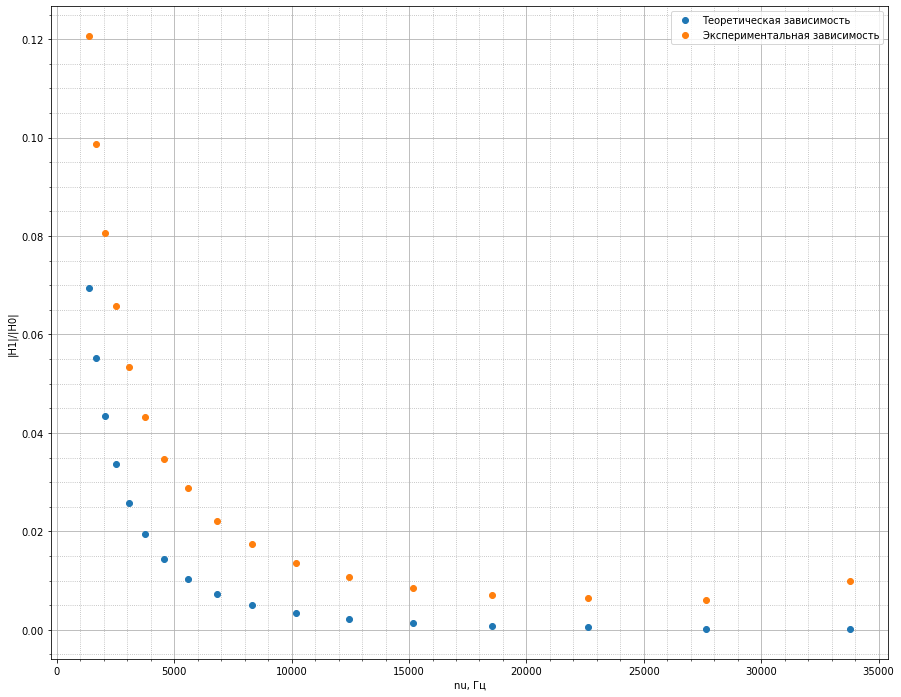

In [173]:
fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("|H1|/|H0|")
ax.set_xlabel("nu, Гц")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

alpha1 = np.sqrt(2 * np.pi * df3['nu, Гц'] * 5.55 * 10 ** 7 * 1.2567 * 10 **(-6))
h = 1.5 * 10 ** (-3)
a = 22.5 * 10 ** (-3)

ax.plot(df3['nu, Гц'], 1 / (np.cosh(alpha1 * h) + 1/2 * alpha1 * a * np.sinh(alpha1 * h)), 'o', label = 'Теоретическая зависимость')
ax.plot(df3['nu, Гц'], c * df3['U, В'] / (df3['nu, Гц'] * df3['I, мА'] / 1000), 'o', label = 'Экспериментальная зависимость')

plt.legend()
plt.show()

### Частоты $[0.5\nu_h ; 15\nu_h]$

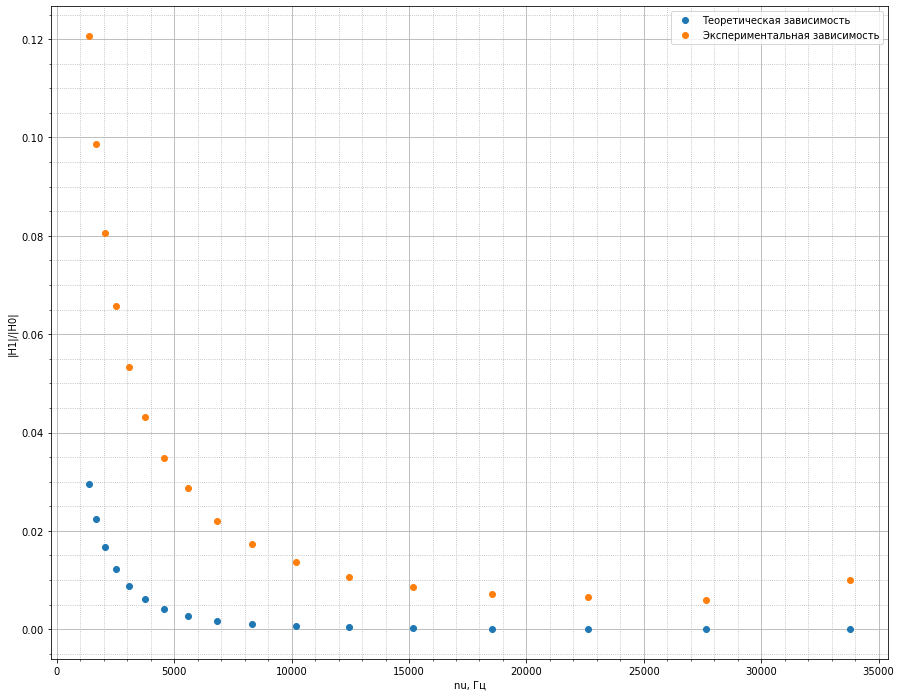

In [178]:
fig, ax = plt.subplots(figsize = (15, 12))

ax.set_ylabel("|H1|/|H0|")
ax.set_xlabel("nu, Гц")
ax.minorticks_on()
ax.grid(which = 'major')
ax.grid(which = 'minor', linestyle = ':')

alpha1 = np.sqrt(2 * np.pi * df3['nu, Гц'] * 11.2 * 10 ** 7 * 1.2567 * 10 **(-6))
h = 1.5 * 10 ** (-3)
a = 22.5 * 10 ** (-3)

ax.plot(df3['nu, Гц'], 1 / (np.cosh(alpha1 * h) + 1/2 * alpha1 * a * np.sinh(alpha1 * h)), 'o', label = 'Теоретическая зависимость')
ax.plot(df3['nu, Гц'], c * df3['U, В'] / (df3['nu, Гц'] * df3['I, мА'] / 1000), 'o', label = 'Экспериментальная зависимость')

plt.legend()
plt.show()

# Вывод

Мы измерили проводимость материала цилиндра 4 разными способами. Сравним эти данные между собой.